### Compute transcriptomic reproducibility correlation for studies with replicate transcriptomic  profiles

**Input:** Transcriptomics data (RNA-Seq) of the cancer cell lines from:
1. <a href=https://www.nature.com/articles/s41586-019-1186-3>Next-generation characterization of the Cancer Cell Line Encyclopedia</a>     
2. <a href=https://www.nature.com/articles/nbt.3080>A comprehensive transcriptional portrait of human cancer cell lines</a>     
                            
**Output:** Gene-wise correlation between replicate mRNA abundances 

#### Import Packages

In [1]:
import pandas as pd
import numpy as np 
import os 
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 1
%aimport standardised_pipeline_utils

In [2]:
get_data_path = lambda folders, fname: os.path.normpath(os.environ['DATA_PATH']+'/'+'/'.join(folders) +'/'+ fname)
get_local_data_path = lambda folders, fname: os.path.normpath('../local_data/'+'/'+'/'.join(folders) +'/'+ fname)

In [3]:
# Input files
file_ccle_transcriptomics = get_data_path(['depmap','20Q4'], 'CCLE_expression.csv')
file_ccle_sample_info = get_data_path(['depmap','20Q4'], 'sample_info.csv')
file_klijn_rnaseq = get_data_path(['klijn_2015'], 'E-MTAB-2706-query-results.tpms.tsv')
file_ghandi_sample_info = get_data_path(['ghandi_2019'], 'Table_S1.xlsx')

# Output files
file_transcriptomic_reproducibility = get_local_data_path(['processed', 'correlation_replicates'], 
                                                          'transcriptomic_reproducibility.xlsx')

#### Next-generation characterization of the Cancer Cell Line Encyclopedia

In [4]:
ccle_sample_info = pd.read_csv(file_ccle_sample_info)
print("Dimensions: ", ccle_sample_info.shape)
ccle_sample_info[:2]

Dimensions:  (1812, 26)


,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIH:OVCAR-3,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,...,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL-60,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,...,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN


In [5]:
ghandi_sample_info = pd.read_excel(file_ghandi_sample_info, sheet_name='Cell Line Annotations')
print("Dimensions: ", ghandi_sample_info.shape)
ghandi_sample_info[:2]

Dimensions:  (1096, 32)


,CCLE_ID,depMapID,Name,Site_Primary,Site_Subtype1,Site_Subtype2,Site_Subtype3,Histology,Hist_Subtype1,Hist_Subtype2,...,Growth.Medium,Supplements,Freezing.Medium,Doubling.Time.from.Vendor,Doubling.Time.Calculated.hrs,type,type_refined,PATHOLOGIST_ANNOTATION,mutRate,tcga_code
0,DMS53_LUNG,ACH-000698,DMS 53,lung,NS,NS,NS,carcinoma,small_cell_carcinoma,NS,...,Waymouth's +10%FBS,NaN,5%DMSO,NaN,450.0,lung_small_cell,lung_small_cell,Lung:SCLC,157.241638,SCLC
1,SW1116_LARGE_INTESTINE,ACH-000489,SW1116,large_intestine,colon,NS,NS,carcinoma,adenocarcinoma,NS,...,L15+10%FBS,NaN,5%DMSO,NaN,123.2,colorectal,colorectal,Colorectal:Carcinoma,94.373192,COAD/READ


In [6]:
ccle_transcriptomics = pd.read_csv(file_ccle_transcriptomics, index_col=0)
print("Dimensions: ", ccle_transcriptomics.shape)
ccle_transcriptomics[:2]

Dimensions:  (1376, 19182)


,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,AC090517.4 (54816),AL160269.1 (11046),ABCF2-H2BE1 (114483834),FO393400.1 (149951),POLR2J3 (548644),H2BE1 (114483833),AL445238.1 (647264),GET1-SH3BGR (106865373),AC024598.1 (22891),AC113348.1 (102724657)
ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,5.05398,...,0.111031,0.15056,1.427606,0.042644,5.781884,0.0,0.0,0.799087,0.014355,0.000000
ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,3.83289,...,0.310340,0.00000,0.807355,0.000000,4.704319,0.0,0.0,0.464668,0.000000,0.070389


In [7]:
# Rename the cell lines given as DepMap ID to CCLE_Name and columns to just contain the hgnc_symbol
ccle_transcriptomics = ccle_transcriptomics.rename(index = dict(zip(ccle_sample_info['DepMap_ID'], 
                                                                    ccle_sample_info['CCLE_Name'])),
                                                   columns = lambda x : str(x).split(' ')[0])
# Transpose to obtain a matrix similar to other studies
ccle_transcriptomics = ccle_transcriptomics.transpose()
ccle_transcriptomics[:2]

,LC1SQSF_LUNG,COGAR359_SOFT_TISSUE,COLO794_SKIN,KKU213_BILIARY_TRACT,RT4_URINARY_TRACT,SNU283_LARGE_INTESTINE,NCIH1395_LUNG,DEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SNU1196_BILIARY_TRACT,LC1F_LUNG,...,BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U343_CENTRAL_NERVOUS_SYSTEM,639V_URINARY_TRACT,MON_SOFT_TISSUE,LOXIMVI_SKIN,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SSP25_BILIARY_TRACT,ECC2_BILIARY_TRACT,A673_BONE,TT_OESOPHAGUS
TSPAN6,4.990501,5.209843,3.77926,5.726831,7.465648,4.914086,4.032982,0.097611,4.712596,5.101398,...,0.070389,4.69265,5.0268,6.699052,4.173127,0.097611,5.045268,5.805292,4.870858,5.117695
TNMD,0.000000,0.545968,0.00000,0.000000,0.000000,0.176323,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### A comprehensive transcriptional portrait of human cancer cell lines

In [8]:
klijn_transcriptomics = pd.read_csv(file_klijn_rnaseq, index_col=0, sep='\t', skiprows=4)
print("Dimensions: ", klijn_transcriptomics.shape)
klijn_transcriptomics[:2]

Dimensions:  (57711, 623)


,Gene Name,"adrenal gland, unknown adrenal cancer, HCC1576","blood, B-cell lymphoma, NU-DUL-1","blood, B-cell lymphoma, RC-K8","blood, Hodgkin's lymphoma, Pfeiffer","blood, acute T cell leukemia, Jurkat, Clone E6-1","blood, acute lymphoblastic leukemia, SUP-B15","blood, acute monocytic leukemia, SIG-M5","blood, acute monocytic leukemia, THP-1","blood, acute myeloid leukemia, HNT-34",...,"zone of skin, melanoma, SK23","zone of skin, melanoma, UACC-257","zone of skin, melanoma, UCSD-242l","zone of skin, melanoma, WM-115","zone of skin, melanoma, WM-266-4","zone of skin, metastatic melanoma, COLO 849","zone of skin, metastatic melanoma, COLO-783","zone of skin, metastatic melanoma, COLO-818","zone of skin, metastatic melanoma, SK-MEL-1","zone of skin, skin squamous cell carcinoma, A-431"
Gene ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,TSPAN6,30.0,NaN,0.3,0.3,0.5,0.2,0.5,1.0,1.0,...,24.0,51.0,11.0,15.0,16.0,20.0,27.0,7.0,26.0,40.0
ENSG00000000005,TNMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
klijn_transcriptomics = klijn_transcriptomics.dropna(subset=['Gene Name']).set_index('Gene Name')
klijn_transcriptomics.columns = [colname.split(',')[2].strip().upper().replace('-','') \
                                  for colname in klijn_transcriptomics.columns]
klijn_transcriptomics = klijn_transcriptomics.rename(columns = dict(zip(ccle_sample_info['stripped_cell_line_name'], 
                                                                    ccle_sample_info['CCLE_Name'])))
klijn_transcriptomics[:2]

,HCC1576,NUDUL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,RCK8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,PFEIFFER_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,JURKAT_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SUPB15_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,SIGM5_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HNT34_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,KASUMI1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,...,SK23,UACC257_SKIN,UCSD242L,WM115_SKIN,WM2664_SKIN,COLO 849,COLO783_SKIN,COLO818_SKIN,SKMEL1_SKIN,A431_SKIN
Gene Name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,30.0,NaN,0.3,0.3,0.5,0.2,0.5,1.0,1.0,0.4,...,24.0,51.0,11.0,15.0,16.0,20.0,27.0,7.0,26.0,40.0
TNMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ccle_transcriptomics_processed = standardised_pipeline_utils.process(ccle_transcriptomics)
klijn_transcriptomics_processed = standardised_pipeline_utils.process(klijn_transcriptomics)

Dimensions:  (19180, 1376)
Dimensions:  (19492, 622)


In [11]:
# restrict the cell lines to the one published in the paper only, 
# as depmap portal can have cell lines from other sources too 
ccle_transcriptomics_processed = ccle_transcriptomics_processed[np.intersect1d(ghandi_sample_info['CCLE_ID'], 
                                                                               ccle_transcriptomics_processed.columns)]
ccle_transcriptomics_processed.shape

(19180, 1022)

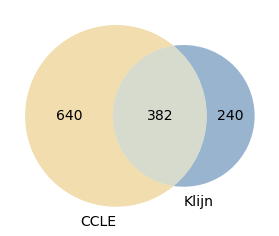

In [12]:
figure, axes = plt.subplots(1,1)
plot = venn2([set(ccle_transcriptomics_processed.columns), set(klijn_transcriptomics_processed.columns)], ax=axes, 
             set_colors=['#ddaa33', '#004488'], set_labels=['CCLE', 'Klijn'])
for text in plot.set_labels:
    text.set_fontsize(14)
for text in plot.subset_labels:
    text.set_fontsize(14)

In [13]:
ccle_subset_processed, klijn_subset_processed = standardised_pipeline_utils.match_proteins_samples( \
                                                                            ccle_transcriptomics_processed, 
                                                                            klijn_transcriptomics_processed)

Number of common proteins:  13226
Number of common samples:  382


In [14]:
correlation_subset_transcriptomic_klijn = standardised_pipeline_utils.correlate_genewise(ccle_subset_processed, 
                                                                            klijn_subset_processed, 'CCLE-Klijn')
correlation_subset_transcriptomic_klijn = correlation_subset_transcriptomic_klijn['CCLE-Klijn']

Median Spearman Correlation:  0.7536


### Computing correlation using random 18 samples of transcriptomic replicates

In [15]:
np.random.seed(10) # specify seed to ensure reproducibility of the analysis
def random_sample_correlation(index):
    random_sample_columns = ccle_subset_processed.sample(n=18, replace=False, axis=1).columns 
    ccle_transcriptomics_random = ccle_transcriptomics_processed[random_sample_columns]
    klijn_transcriptomics_random = klijn_transcriptomics_processed[random_sample_columns]
    print("Iteration ", index, ': ', end = '')
    return(standardised_pipeline_utils.correlate_genewise(ccle_transcriptomics_random, klijn_transcriptomics_random, 
                                                          'Iteration'+str(index)).dropna())    

In [16]:
import warnings
from  scipy.stats import SpearmanRConstantInputWarning
warnings.filterwarnings(action='ignore', category=SpearmanRConstantInputWarning)

In [17]:
# random sampling to compare the predictive power of transcriptomic and proteomic reproducibility 
# over the same number of samples / cell lines
correlation_random_transcriptomic_klijn = [random_sample_correlation(i) for i in range(100)]

Iteration  0 : Median Spearman Correlation:  0.7998
Iteration  1 : Median Spearman Correlation:  0.7992
Iteration  2 : Median Spearman Correlation:  0.7343
Iteration  3 : Median Spearman Correlation:  0.7653
Iteration  4 : Median Spearman Correlation:  0.7626
Iteration  5 : Median Spearman Correlation:  0.7853
Iteration  6 : Median Spearman Correlation:  0.6987
Iteration  7 : Median Spearman Correlation:  0.7115
Iteration  8 : Median Spearman Correlation:  0.7766
Iteration  9 : Median Spearman Correlation:  0.7847
Iteration  10 : Median Spearman Correlation:  0.7887
Iteration  11 : Median Spearman Correlation:  0.7614
Iteration  12 : Median Spearman Correlation:  0.7907
Iteration  13 : Median Spearman Correlation:  0.7647
Iteration  14 : Median Spearman Correlation:  0.7494
Iteration  15 : Median Spearman Correlation:  0.7477
Iteration  16 : Median Spearman Correlation:  0.7282
Iteration  17 : Median Spearman Correlation:  0.7296
Iteration  18 : Median Spearman Correlation:  0.7758
Ite

In [18]:
correlation_random_transcriptomic_klijn = pd.concat(correlation_random_transcriptomic_klijn, axis=1)

In [19]:
writer = pd.ExcelWriter(file_transcriptomic_reproducibility)
correlation_subset_transcriptomic_klijn.to_excel(writer, 'Reproducibility')
correlation_random_transcriptomic_klijn.to_excel(writer, 'Random Reproducibility')
writer.save()